### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
df_silhoutte=pd.read_csv("vehicle.csv")
df_silhoutte.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [3]:
df_silhoutte.shape

(846, 19)

In [4]:
# check for null is na values
df_silhoutte.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [5]:
# dropping na values from the dataframe.
df_silhoutte.dropna(inplace=True)

In [6]:
# checking again if there is any missing value left
df_silhoutte.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

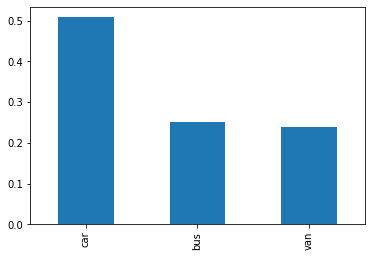

In [7]:
prob = df_silhoutte['class'].value_counts(normalize=True)
threshold = 0.02
prob.plot(kind='bar')
plt.show()

In [8]:
classValue=df_silhoutte['class'].value_counts()
print(classValue)

car    413
bus    205
van    195
Name: class, dtype: int64


### Check for any missing values in the data 

In [9]:
# checking the 5 points summary first
df_silhoutte.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,813.0,93.656827,8.233751,73.0,87.0,93.0,100.0,119.0
circularity,813.0,44.803198,6.146659,33.0,40.0,44.0,49.0,59.0
distance_circularity,813.0,82.043050,15.783070,40.0,70.0,79.0,98.0,112.0
radius_ratio,813.0,169.098401,33.615402,104.0,141.0,167.0,195.0,333.0
pr.axis_aspect_ratio,813.0,61.774908,7.973000,47.0,57.0,61.0,65.0,138.0
max.length_aspect_ratio,813.0,8.599016,4.677174,2.0,7.0,8.0,10.0,55.0
scatter_ratio,813.0,168.563346,33.082186,112.0,146.0,157.0,198.0,265.0
elongatedness,813.0,40.988930,7.803380,26.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,813.0,20.558426,2.573184,17.0,19.0,20.0,23.0,29.0
max.length_rectangularity,813.0,147.891759,14.504648,118.0,137.0,146.0,159.0,188.0


In [10]:
# since in the first question, it was mentioned to drop missing values. So please check question 1. Right now the answer to this question will be no missing value
df_silhoutte.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

In [11]:
df1=df_silhoutte.drop('class', axis=1)
df1=df1.apply(zscore)
df1.head().T



,0,1,2,3,4
compactness,0.163231,-0.322874,1.256966,-0.079822,-1.052030
circularity,0.520408,-0.619123,0.845988,-0.619123,-0.130753
distance_circularity,0.060669,0.124067,1.518823,-0.002729,-0.763506
radius_ratio,0.264970,-0.836393,1.187734,-0.300595,1.068668
pr.axis_aspect_ratio,1.283254,-0.599253,0.530251,0.153750,5.173770
max.length_aspect_ratio,0.299721,0.085785,0.299721,0.085785,9.285029
scatter_ratio,-0.198517,-0.591720,1.162569,-0.742952,-0.591720
elongatedness,0.129648,0.514333,-1.152637,0.642562,0.514333
pr.axis_rectangularity,-0.217151,-0.606014,0.949438,-0.606014,-0.606014
max.length_rectangularity,0.766312,-0.337462,0.697326,-0.337462,-0.268476


Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [12]:
distortion=[]
distortion

[]

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [13]:
from scipy.spatial.distance import cdist


In [14]:
sse_df = pd.DataFrame(columns=['K','SSE'])
K=range(1,11)
for i in K :
    
    #Initialize KMeans
    km = KMeans(n_clusters=i)
    
    #Fit on the data
    km.fit(df1)
    
    #Add cluster information for each record in dataframe
    #df1['k_' + str(i)] = km.predict(df1)
    cdistValue = (sum(np.min(cdist(df1, km.cluster_centers_, 'euclidean'), axis=1)))
    distortion.append(cdistValue/df1.shape[0])
    #Track K and SSE information in sse_df
    sse_df.loc[sse_df.shape[0]] = [i, km.inertia_]
    

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [15]:
cdistValue

1656.5093953746164

### 6. Plotting Elbow/ Scree Plot

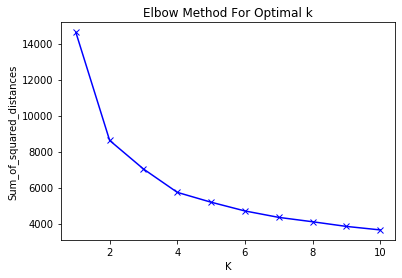

In [16]:
# sns.lineplot(x='K', y='SSE', data=sse_df)
plt.plot(K, sse_df.SSE, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

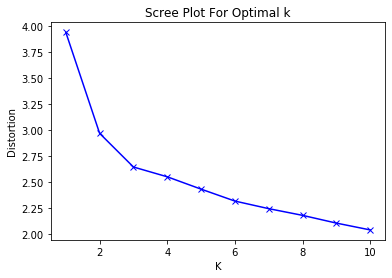

In [17]:
plt.plot(K, distortion, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Scree Plot For Optimal k')
plt.show()

### Find out the optimal value of K

In [18]:
print("After K=4, the Sum of Squared Error value has decreased drastically. Therefore Optimal Value of K=4")

After K=4, the Sum of Squared Error value has decreased drastically. Therefore Optimal Value of K=4


In [19]:
df1.dtypes

compactness                    float64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio        float64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity      float64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                  float64
dtype: object

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

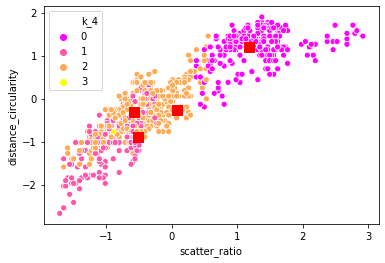

In [20]:
km=KMeans(n_clusters=4)
km.fit(df1)
df1['k_4'] = km.predict(df1)
sns.scatterplot(x='scatter_ratio', y='distance_circularity', hue='k_4', data=df1, palette='spring')
plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,2], s=100, marker='s', c='red', label='Centroids')

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [21]:
df1.drop('k_4', axis=1, inplace=True)


### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [22]:

centroids=pd.DataFrame(columns=df1.columns, data=km.cluster_centers_)
centroids.head().T

,0,1,2,3
compactness,1.154428,-0.915758,-0.228397,-0.733024
circularity,1.184286,-0.522403,-0.577113,0.072735
distance_circularity,1.211987,-0.889506,-0.308062,-0.272171
radius_ratio,0.973322,-1.087728,-0.041242,2.947683
pr.axis_aspect_ratio,0.094921,-0.561971,0.178445,6.836652
max.length_aspect_ratio,0.218659,-0.300016,-0.173699,8.696706
scatter_ratio,1.297968,-0.779779,-0.456880,-0.535008
elongatedness,-1.214247,0.867364,0.321991,0.466248
pr.axis_rectangularity,1.301845,-0.745939,-0.485592,-0.557406
max.length_rectangularity,1.098306,-0.485536,-0.539969,0.283411


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [23]:
print(km.labels_)

[2 2 0 2 3 2 2 2 2 2 2 2 2 0 1 2 0 1 1 2 2 0 2 1 0 0 1 2 2 2 0 2 1 3 0 1 0
 1 1 2 0 1 1 1 1 2 1 2 0 2 0 2 2 1 0 1 0 1 1 1 2 1 0 2 0 0 2 1 2 0 2 1 1 0
 2 1 2 0 2 1 2 1 0 2 0 2 1 0 1 1 0 1 3 2 2 1 0 0 1 1 0 2 2 1 1 1 2 0 0 2 1
 1 2 1 1 1 1 1 2 0 0 2 2 1 0 3 1 2 1 2 2 0 1 2 0 2 2 2 2 0 2 2 0 2 0 2 1 2
 1 0 2 2 0 0 2 0 1 1 0 0 2 0 2 2 2 2 1 0 1 2 1 0 2 2 2 0 2 0 2 0 2 1 0 1 1
 1 2 2 0 0 2 2 2 1 0 2 2 2 0 1 1 0 1 2 0 1 1 1 2 0 2 0 1 1 1 1 0 2 1 2 0 1
 2 2 1 0 1 1 2 2 0 1 0 1 2 2 0 2 2 0 0 1 2 2 2 0 1 2 2 1 1 2 2 0 2 1 1 0 2
 2 1 1 0 1 2 0 1 2 3 2 2 0 2 0 1 2 2 0 2 2 2 1 2 0 0 0 0 1 2 0 1 1 1 2 1 0
 0 1 0 2 1 0 1 2 2 0 0 1 0 0 1 0 2 2 2 1 1 0 0 0 2 2 2 0 1 2 1 0 2 2 0 2 0
 0 0 2 1 1 0 1 1 1 2 2 2 2 1 0 0 1 1 0 1 0 1 0 2 1 2 1 3 0 1 2 2 2 0 2 2 2
 2 0 2 0 2 0 2 1 1 2 2 2 1 1 2 1 0 2 2 1 1 0 2 1 2 2 0 2 0 2 0 0 1 1 0 2 1
 1 2 0 0 1 2 0 0 1 0 0 0 2 2 2 2 2 0 1 1 2 0 2 2 0 2 1 0 1 1 0 2 1 0 0 0 1
 0 0 1 2 1 0 0 2 2 1 1 0 2 1 0 0 2 1 0 0 2 1 1 0 0 0 1 1 0 0 0 2 2 0 1 2 0
 2 1 1 2 0 1 2 2 1 3 0 2 

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [24]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [25]:
datafr=pd.DataFrame(data=a, columns=['A', 'B'])

datafr2 = pd.DataFrame(data=b, columns=['A', 'B'])
datafr3 = pd.DataFrame(data=c, columns=['A', 'B'])
dataFrame = datafr.append([datafr2, datafr3])



### 9. Combine all three arrays a,b,c into a dataframe

In [26]:
new_dataframe=pd.DataFrame(columns=['A', 'B'], data=dataFrame)
new_dataframe.shape

(250, 2)

### 10. Use scatter matrix to print all the 3 distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C6E9B00>,
      dtype=object)

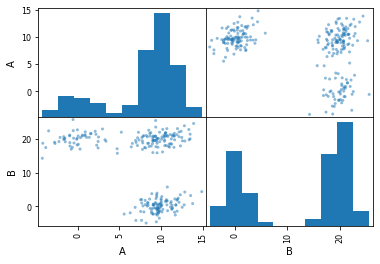

In [27]:
pd.plotting.scatter_matrix(new_dataframe)


### 11. Find out the linkage matrix

In [28]:
linkage(dataFrame, metric='euclidean')


array([[2.09000000e+02, 2.40000000e+02, 3.84985111e-02, 2.00000000e+00],
       [2.23000000e+02, 2.48000000e+02, 5.02201916e-02, 2.00000000e+00],
       [2.10000000e+01, 3.70000000e+01, 5.16367316e-02, 2.00000000e+00],
       [6.40000000e+01, 9.80000000e+01, 5.46244928e-02, 2.00000000e+00],
       [5.80000000e+01, 9.60000000e+01, 8.23656454e-02, 2.00000000e+00],
       [1.38000000e+02, 1.40000000e+02, 8.91578713e-02, 2.00000000e+00],
       [2.19000000e+02, 2.41000000e+02, 9.20486463e-02, 2.00000000e+00],
       [1.41000000e+02, 1.49000000e+02, 1.00798974e-01, 2.00000000e+00],
       [2.06000000e+02, 2.45000000e+02, 1.03836494e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.10312316e-01, 2.00000000e+00],
       [1.74000000e+02, 2.31000000e+02, 1.13409522e-01, 2.00000000e+00],
       [1.57000000e+02, 2.02000000e+02, 1.13480831e-01, 2.00000000e+00],
       [1.59000000e+02, 1.81000000e+02, 1.14492948e-01, 2.00000000e+00],
       [1.30000000e+01, 8.00000000e+01, 1.19371749e

Use ward as linkage metric and distance as Eucledian

### 12. Plot the dendrogram for the consolidated dataframe

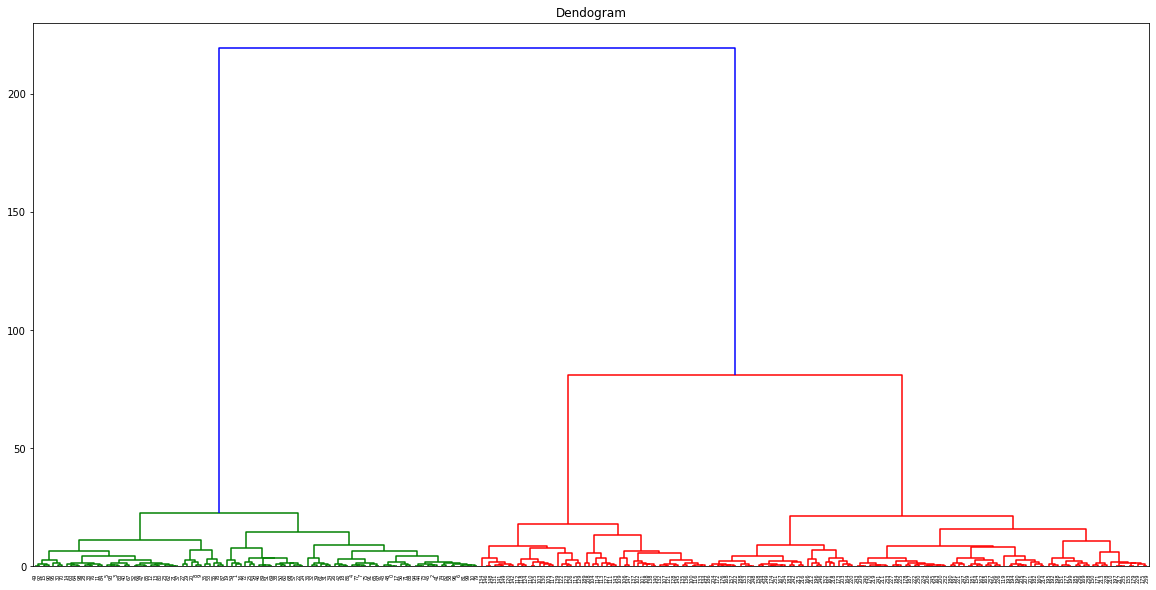

In [29]:
fig = plt.figure(figsize=(20, 10))
plt.title("Dendogram")
dn = dendrogram(linkage(dataFrame, metric='euclidean', method='ward'))
plt.show()

### 13. Recreate the dendrogram for last 12 merged clusters 

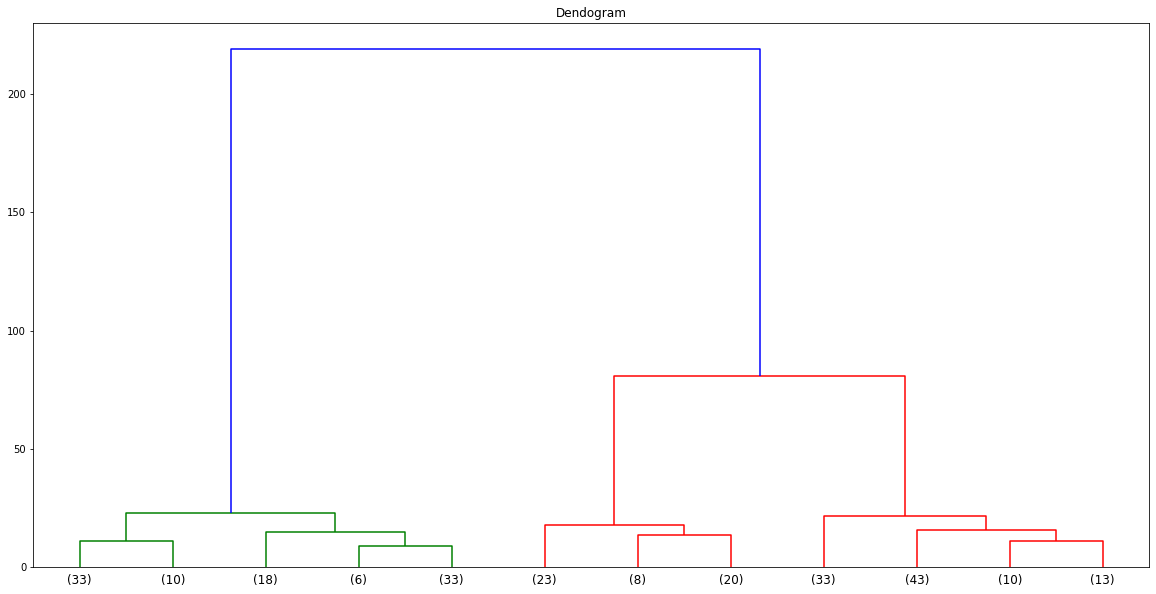

In [30]:
fig = plt.figure(figsize=(20, 10))
plt.title("Dendogram")
dn = dendrogram(linkage(dataFrame, metric='euclidean', method='ward'), truncate_mode='lastp', p=12)
plt.show()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. Using this distance measure and AgglomerativeClustering() function to cluster the data into 3 different groups

In [31]:
ac = AgglomerativeClustering(n_clusters=3, linkage='ward')
dataFrame['Cluster_3'] = ac.fit_predict(dataFrame)


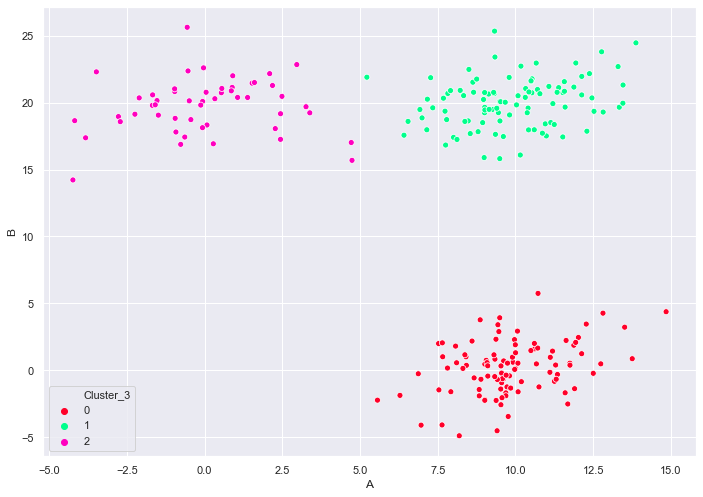

In [32]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=dataFrame.A, y=dataFrame.B, hue=dataFrame['Cluster_3'], palette='gist_rainbow')

### 15. Use matplotlib to visually observe the clusters in 2D space 

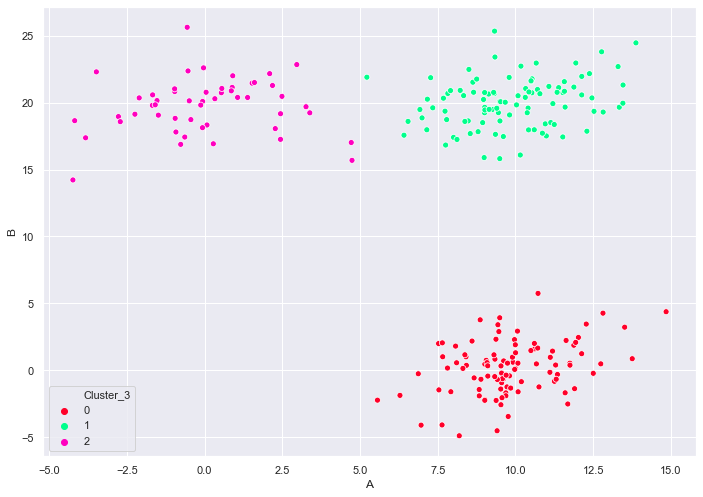

In [33]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=dataFrame.A, y=dataFrame.B, hue=dataFrame['Cluster_3'], palette='gist_rainbow')